# <font Color = 'blue'>Lending Club Case Study


#### _Importing required packages_

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### _Setting up required parameters_

In [2]:
#Setting required parameters
pd.options.display.float_format = '{:.2f}'.format #formatting decimal points
pd.set_option('display.max_columns', 100) #setting to display all coolumns

#### _Loading source files_

In [69]:
#loading csv file to analyze lenading case study
df_loan_csv = pd.read_csv('loan.csv')
#df_loan_csv.describe()

In [5]:
df_loan_csv.shape

(39717, 111)

In [6]:
#df_loan_csv

### Data cleanup
***
* <font color = red> _We will remove redundant data_</font>
 1. no need of months appended with term. e.g 36 months can be only 36
* <font color = red> _we will remove columns which are not required to do the case study_</font>
 1.  All application types are individual
 2.  All policy_code values are 1
 3.  All collections_12_mths_ex_med are either 0 or NA
 4.  next_pymnt_d values are mostly blnk
 5.  Column values from BB till DH are either NA or 0


In [7]:
df_loan_csv.columns.get_loc('collections_12_mths_ex_med')

49

In [8]:
df_loan_csv.columns.get_loc('total_il_high_credit_limit')

110

In [9]:
#taking a subset of df_loan_csv from column index 0 to 48
df_loan = df_loan_csv.iloc[:,0:49]
df_loan.shape


(39717, 49)

#### But we should not remove 'pub_rec_bankruptcies' column which is a major factor to identify defaulters. So we are adding this column back in df_loan

In [10]:
df_loan["pub_rec_bankruptcies"] = df_loan_csv[['pub_rec_bankruptcies']]

In [11]:
df_loan.shape

(39717, 50)

In [12]:
#Also we dont need the url,desc,emp_title,zip_code,id,member_id,addr_state in this analysis

df_loan = df_loan.drop(['url','desc','emp_title','zip_code','id','member_id','addr_state'],axis=1)
df_loan.shape

(39717, 43)

In [13]:
#df_loan.info()

In [14]:
#We have total 42 columns now. Lets remove the columns where  more that 50% values are missing
df_loan.isnull().sum(axis=0)

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

In [15]:
#Lets remove columns 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d' has mostly missing values
df_loan = df_loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
df_loan.shape

(39717, 40)

##### Now we have only 40 columns left with us to do further data cleanup

In [16]:
#Checkign unique values in each column
df_loan.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
purpose                       14
title                      19615
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
initial_list_status            1
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymn

#### 'pymnt_plan','initial_list_status' has only one unique value so lets remove these two columns         

In [17]:
df_loan= df_loan.drop(['pymnt_plan','initial_list_status'],axis=1)

In [18]:
df_loan.shape

(39717, 38)

#### Now lets check which columns has >50% missing values

In [19]:
df_loan_missing_values = df_loan.isnull().sum()
df_loan_missing_values

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [20]:
#As we can see emp_length has 1075 missing values lets fill these with mode of emp_length
df_loan['emp_length'].mode()

0    10+ years
dtype: object

##### Terms has only two inuque values: 36 months & 60 months. We will replace these values with 36 months : 0 & 60 months : 1

In [21]:
df_loan['term'] = [0 if i.strip() == '36 months' else 1 for i in df_loan['term']]

In [22]:
df_loan_c = df_loan.copy()

In [23]:
# Removing % from int_rate & revol_util
df_loan['int_rate']=df_loan['int_rate'].str.replace('%',"").astype(float)
df_loan['revol_util']=df_loan['revol_util'].str.replace('%',"").astype(float)

#df_loan

In [24]:
#We need to make emp_length numeric. So let's check the unique values in this column
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [25]:
##### We need to replace nan with zero and have to remove year or years or + to make this column numeric
#As we have <1 year and 1 year so let's replace <1year to 0.5
df_loan['emp_length'] = ["0.5" if i=='< 1 year' else i for i in df_loan['emp_length']]
#df_loan

In [26]:
#now removing other characters using regex e.g. 10+ years will be 10, 3 years will be 3 and replacing nan to 0
df_loan['emp_length'] = df_loan['emp_length'].replace('[^0-9.]','',regex=True).fillna(0)
df_loan['emp_length'].unique()

array(['10', '0.5', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0],
      dtype=object)

In [27]:
#Removing duplicate rows if there is nay
df_loan = df_loan.drop_duplicates()
df_loan.shape

(39717, 38)

In [28]:
#Now lets save this DF in a seperate csv and we will work on that CSV here onwards.
df_loan.to_csv("df_loan_cleaned.csv",encoding='utf-8', index=False)


In [29]:
#Reading data from cleaned CSV 
df_loan_cleaned = pd.read_csv('df_loan_cleaned.csv')

In [30]:
#Removing duplicate rows if there is nay
df_loan_cleaned = df_loan_cleaned.drop_duplicates()
df_loan_cleaned.shape
#df_loan_cleaned

(39717, 38)

### Derived matrics

In [31]:
#Lets format the dates now
df_loan_cleaned.issue_d = pd.to_datetime(df_loan_cleaned.issue_d, format='%b-%y')
df_loan_cleaned.earliest_cr_line = pd.to_datetime(df_loan_cleaned.earliest_cr_line, format='%b-%y')
df_loan_cleaned.last_pymnt_d = pd.to_datetime(df_loan_cleaned.last_pymnt_d, format='%b-%y')
df_loan_cleaned.last_credit_pull_d = pd.to_datetime(df_loan_cleaned.last_credit_pull_d, format='%b-%y')
#df_loan_cleaned

In [32]:
df_loan_cleaned['issue_d_yr'] = pd.DatetimeIndex(df_loan_cleaned['issue_d']).year
df_loan_cleaned['issue_d_month'] = pd.DatetimeIndex(df_loan_cleaned['issue_d']).month
df_loan_cleaned['earliest_cr_line_yr'] = df_loan_cleaned['earliest_cr_line'].dt.year
df_loan_cleaned['earliest_cr_line_month'] = df_loan_cleaned['earliest_cr_line'].dt.month
df_loan_cleaned['last_pymnt_d_yr'] = df_loan_cleaned['last_pymnt_d'].dt.year
df_loan_cleaned['last_pymnt_d_month'] = df_loan_cleaned['last_pymnt_d'].dt.month
df_loan_cleaned['last_credit_pull_d_yr'] = pd.DatetimeIndex(df_loan_cleaned['last_credit_pull_d']).year
df_loan_cleaned['last_credit_pull_d_month'] = pd.DatetimeIndex(df_loan_cleaned['last_credit_pull_d']).month

### Data Analysis

In [33]:
#Taking a subset of df_loan_cleaned to do Univariate Analysis on the given data
df_loan_status = df_loan_cleaned[['issue_d_yr','loan_status']]
df_loan_chargedoff = df_loan_status[(df_loan_status['loan_status']=='Charged Off')]
df_loan_status.head(5)

issue_d_yr  loan_status
0        2011   Fully Paid
1        2011  Charged Off
2        2011   Fully Paid
3        2011   Fully Paid
4        2011      Current

#### <font color=red>Univariate Analysis</font>

* <font color = blue>Yearly Chrged off : Segmented Univariate</font>


##### Yearly charged off frequency plot

Text(0, 0.5, 'Charged Off Count')

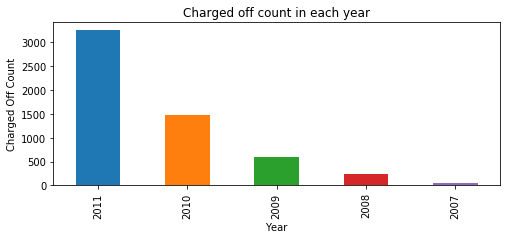

In [34]:
yearly_charedoff = df_loan_chargedoff['issue_d_yr'].value_counts().plot(kind='bar',
                                    figsize=(8,3),
                                    title="Charged off count in each year")
yearly_charedoff.set_xlabel("Year")
yearly_charedoff.set_ylabel("Charged Off Count")


#### Total loan vs loan status

#### <font color=red>Bivariate Analysis</font>

In [35]:
#We are plotting the graph of total loan amt vs loan status 
loan_amount_status = df_loan_cleaned[['loan_amnt','loan_status']]
group = loan_amount_status.groupby('loan_status').sum()
group.shape

(3, 1)

In [36]:
loan_amt_status=loan_amount_status.groupby('loan_status').sum().reset_index()
loan_amt_status

loan_status  loan_amnt
0  Charged Off   68111375
1      Current   19441550
2   Fully Paid  358049725

[Text(0, 0.5, 'Total Loan Amount'), Text(0.5, 0, 'Loan Status')]

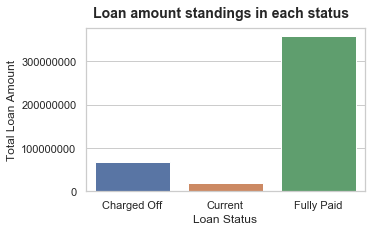

In [37]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(5,3))
plt.suptitle('Loan amount standings in each status', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='loan_amnt', data=loan_amt_status)
plt.ticklabel_format(style='plain', axis='y',useOffset=False) # to remove exponential formats
ax.set(xlabel='Loan Status', ylabel='Total Loan Amount')

### Loan purpose vs total loan distribution

In [38]:
loan_purpose = df_loan_cleaned[['purpose','loan_amnt']]
loan_purpose = loan_purpose.groupby('purpose').sum().reset_index()
#loan_purpose

[Text(0, 0.5, 'Total Loan Amount'), Text(0.5, 0, 'Purpose')]

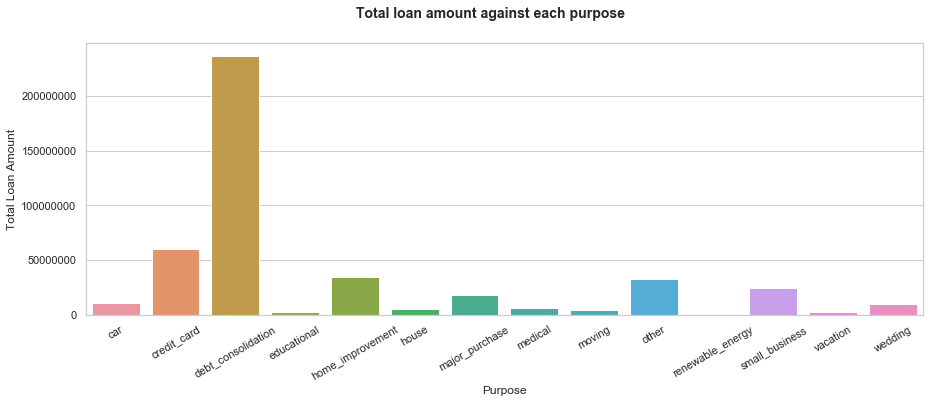

In [39]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(15,5))
plt.suptitle('Total loan amount against each purpose', fontsize=14, fontweight='bold')
ax = sns.barplot(x='purpose',y='loan_amnt', data=loan_purpose)
plt.ticklabel_format(style='plain', axis='y',useOffset=False) # to remove exponential formats
plt.setp(ax.get_xticklabels(), rotation=30) #rotating the x axiz lebel to avoid overlapping
ax.set(xlabel='Purpose', ylabel='Total Loan Amount')

#### In which purpose max charged off 

In [40]:
loan_purpose_status = df_loan_cleaned[['purpose','loan_status']]
loan_purpose_status = loan_purpose_status.groupby('purpose').count().reset_index()
#loan_purpose_status

[Text(0, 0.5, 'Charged off count'), Text(0.5, 0, 'Purpose')]

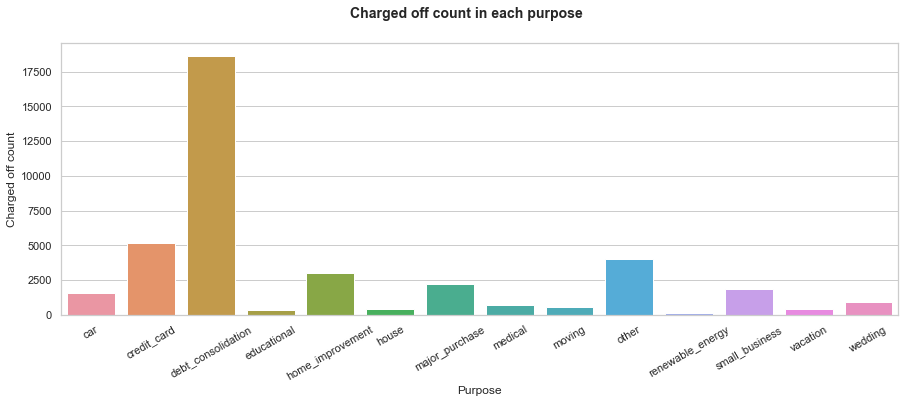

In [41]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(15,5))
plt.suptitle('Charged off count in each purpose', fontsize=14, fontweight='bold')
ax = sns.barplot(x='purpose',y='loan_status', data=loan_purpose_status)
plt.ticklabel_format(style='plain', axis='y',useOffset=False) # to remove exponential formats
plt.setp(ax.get_xticklabels(), rotation=30) #rotating the x axiz lebel to avoid overlapping
ax.set(xlabel='Purpose', ylabel='Charged off count')

#### So from above plot we can conclude not to approve debt_consolidation loans without proper investigation

#### Loan grade vs annual income

In [42]:
loan_grade_annual_income = df_loan_cleaned[['grade','annual_inc']]
#loan_status_loan_amt.describe()
loan_grade_annual_income = loan_grade_annual_income.groupby('grade').mean().reset_index()
loan_grade_annual_income = pd.DataFrame(loan_grade_annual_income)
#loan_grade_annual_income

[Text(0, 0.5, 'Annual Income'), Text(0.5, 0, 'Grade')]

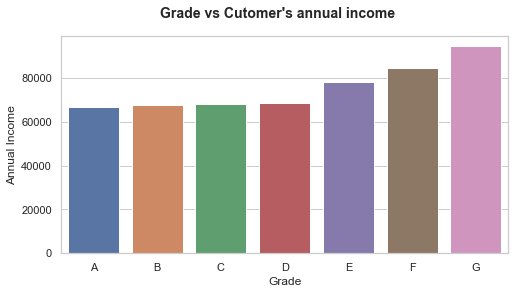

In [43]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(8,4))
plt.suptitle('Grade vs Cutomer\'s annual income', fontsize=14, fontweight='bold')
ax = sns.barplot(x='grade',y='annual_inc', data=loan_grade_annual_income)
ax.set(xlabel='Grade', ylabel='Annual Income')

#### Checking charged off count in each loan grade

In [44]:
loan_grade_status = df_loan_cleaned[['grade','loan_status']]
loan_grade_chargedoff = loan_grade_status[(loan_grade_status['loan_status'])=='Charged Off']
loan_grade_chargedoff = loan_grade_chargedoff.groupby('grade').count().reset_index()

#loan_grade_chargedoff

[Text(0, 0.5, 'Charged off count'), Text(0.5, 0, 'Grade')]

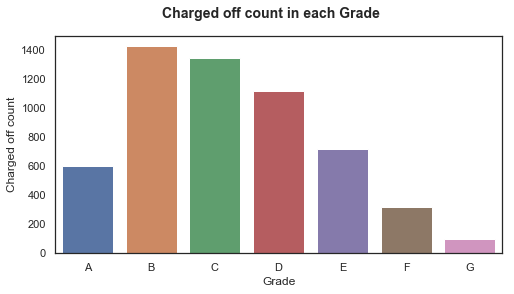

In [45]:
#setting seaborn theme
sns.set(style = "white")
# Set the figure size
plt.figure(figsize=(8,4))
plt.suptitle('Charged off count in each Grade', fontsize=14, fontweight='bold')
ax = sns.barplot(x='grade',y='loan_status', data=loan_grade_chargedoff)
ax.set(xlabel='Grade', ylabel='Charged off count')

### Based on the above two plots "Grade vs Cutomer's annual income" and "Charged off count in each Grade" we can conclude if  a person's annual income is greatern that 80000.00, there is least chance of charge off

#### charge off vs annual income

In [46]:
loan_annual_inc_status = df_loan_cleaned[['annual_inc','loan_status']]
#loan_annual_inc_status = loan_annual_inc_status[(loan_annual_inc_status['loan_status'])=='Charged Off']
#loan_annual_inc_status

D:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Charged off count'), Text(0.5, 0, 'Loan Status')]

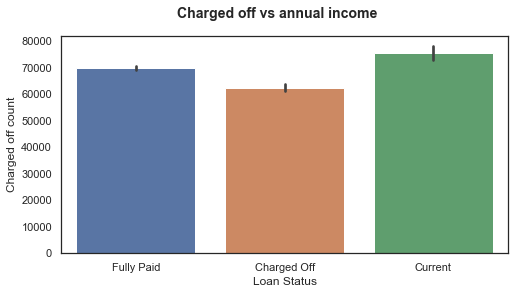

In [47]:
#setting seaborn theme
sns.set(style = "white")
# Set the figure size
plt.figure(figsize=(8,4))
plt.suptitle('Charged off vs annual income', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='annual_inc', data=loan_annual_inc_status)
ax.set(xlabel='Loan Status', ylabel='Charged off count')

#### DTI vs charged off

In [48]:
loan_dti_status = df_loan_cleaned[['dti','loan_status']]
loan_dti_status = loan_dti_status[(loan_dti_status['loan_status'])!='Current']
group_dti_status = loan_dti_status.groupby('loan_status').mean().reset_index()
group_dti_status = pd.DataFrame(group_dti_status)
group_dti_status

loan_status   dti
0  Charged Off 14.00
1   Fully Paid 13.15

[Text(0, 0.5, 'Charged off count'), Text(0.5, 0, 'Loan Status')]

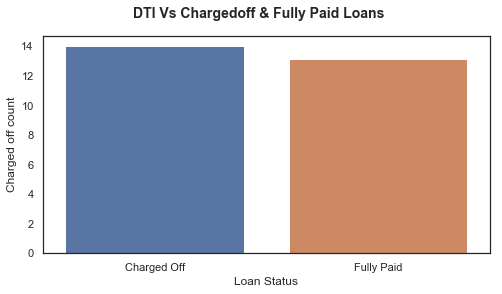

In [49]:
#setting seaborn theme
sns.set(style = "white")
# Set the figure size
plt.figure(figsize=(8,4))
plt.suptitle('DTI Vs Chargedoff & Fully Paid Loans', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='dti', data=group_dti_status)
ax.set(xlabel='Loan Status', ylabel='Charged off count')

#### from above plot we can see if DTI is more there is a risk that customer will not payoff loan

#### Status vs avg loan amount

In [50]:
loan_status_loan_amt = df_loan_cleaned[['loan_amnt','loan_status']]
#loan_status_loan_amt.describe()
loan_status_loan_amt = loan_status_loan_amt.groupby('loan_status').mean().reset_index()
loan_status_loan_amt = pd.DataFrame(loan_status_loan_amt)
loan_status_loan_amt

loan_status  loan_amnt
0  Charged Off   12104.39
1      Current   17053.99
2   Fully Paid   10866.46

[Text(0, 0.5, 'Average Loan Amount'), Text(0.5, 0, 'Loan Status')]

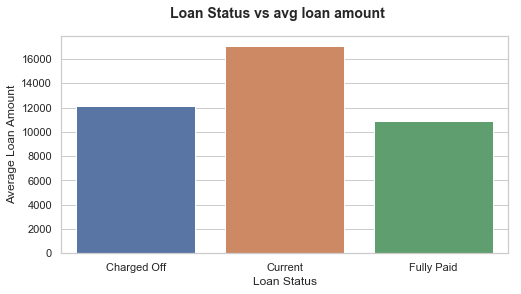

In [51]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(8,4))
plt.suptitle('Loan Status vs avg loan amount', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='loan_amnt', data=loan_status_loan_amt)
ax.set(xlabel='Loan Status', ylabel='Average Loan Amount')

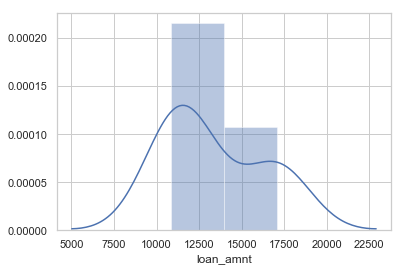

In [52]:
sns.distplot(loan_status_loan_amt['loan_amnt'])

#### Int rate vs count of loan status

In [53]:
loan_int_rate_loan_status = df_loan_cleaned[['int_rate','loan_status']]
#loan_status_loan_amt.describe()
loan_int_rate_loan_status = loan_int_rate_loan_status.groupby('loan_status').mean().reset_index()
loan_int_rate_loan_status = pd.DataFrame(loan_int_rate_loan_status)
loan_int_rate_loan_status

loan_status  int_rate
0  Charged Off     13.82
1      Current     15.03
2   Fully Paid     11.61

[Text(0, 0.5, 'Interest Rate'), Text(0.5, 0, 'Loan Status')]

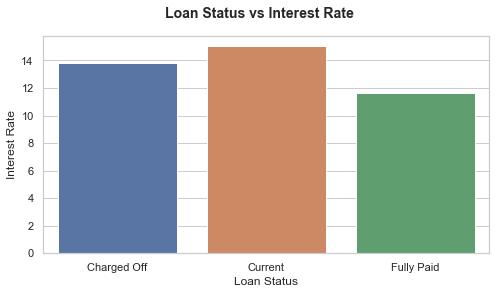

In [54]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(8,4))
plt.suptitle('Loan Status vs Interest Rate', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='int_rate', data=loan_int_rate_loan_status)
ax.set(xlabel='Loan Status', ylabel='Interest Rate')

In [55]:
loan_int_rate_dti = df_loan_cleaned[['int_rate','dti']]
loan_int_rate_dti.sort_values(by = 'dti',ascending=True)
#loan_status_loan_amt.describe()
#loan_int_rate_loan_status = loan_int_rate_loan_status.groupby('loan_status').mean().reset_index()
#loan_int_rate_loan_status = pd.DataFrame(loan_int_rate_loan_status)
#loan_int_rate_loan_status

int_rate   dti
23232     10.36  0.00
16776      7.29  0.00
32459     13.85  0.00
28248     16.45  0.00
33863     16.70  0.00
25903     11.86  0.00
33838      8.94  0.00
38427     10.33  0.00
16529     13.80  0.00
7223      10.65  0.00
39632      7.43  0.00
2938       7.51  0.00
26134      7.88  0.00
22128     13.35  0.00
14064      7.49  0.00
35963      9.32  0.00
35983     12.53  0.00
22139     10.36  0.00
14077     10.59  0.00
33750     12.18  0.00
38476      8.32  0.00
2629       7.90  0.00
32782     12.18  0.00
8910       9.99  0.00
22051     14.83  0.00
25128     11.86  0.00
34175      8.94  0.00
7872      10.59  0.00
31992     10.99  0.00
39034     10.39  0.00
...         ...   ...
17993      7.29 29.62
20822     15.28 29.63
3252      10.65 29.63
5438      10.65 29.64
8624      10.99 29.65
13383      5.99 29.65
14717     10.99 29.65
18260      7.29 29.65
17195      7.29 29.71
3153       6.03 29.72
2453      12.69 29.73
13553      8.49 29.73
9489       6.99 29.76
15650      7.49 29.77
15491     11.99 29.78
7985       9.99 29.79
17937     10.74 29.82
2008      12.69 29.83
137        6.62 29.85
14494      6.99 29.86
3976       6.03 29.86
9167       6.99 29.88
15952      7.66 29.89
10298      5.99 29.92
4851       6.03 29.92
10458      7.49 29.93
16244     10.00 29.93
17153      7.66 29.93
14991     11.99 29.95
12678      8.49 29.99

[39717 rows x 2 columns]

In [56]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(80,30))
plt.suptitle('Charged off vs int rate', fontsize=14, fontweight='bold')
#sns.barplot(x='dti',y='int_rate', data=loan_int_rate_dti)

Text(0.5, 0.98, 'Charged off vs int rate')

<Figure size 5760x2160 with 0 Axes>

#### Charge off vs public record

In [57]:
loan_pub_rec_loan_status = df_loan_cleaned[['pub_rec','loan_status']]
#loan_status_loan_amt.describe()
loan_pub_rec_loan_status = loan_pub_rec_loan_status.groupby('loan_status').mean().reset_index()
loan_pub_rec_loan_status = pd.DataFrame(loan_pub_rec_loan_status)
loan_pub_rec_loan_status

loan_status  pub_rec
0  Charged Off     0.08
1      Current     0.04
2   Fully Paid     0.05

[Text(0, 0.5, 'Public Record'), Text(0.5, 0, 'Loan Status')]

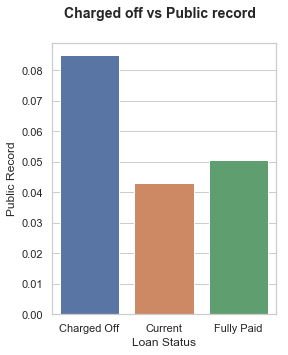

In [58]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(4,5))
plt.suptitle('Charged off vs Public record', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='pub_rec', data=loan_pub_rec_loan_status)
ax.set(xlabel='Loan Status', ylabel='Public Record')

#### If pub rec is high, there is a high risk that loan amount will not be paid.

#### Charge off vs pub_rec_bankruptcies

In [59]:
loan_bkrpt_loan_status = df_loan_cleaned[['pub_rec_bankruptcies','loan_status']]
#loan_status_loan_amt.describe()
loan_bkrpt_loan_status = loan_bkrpt_loan_status.groupby('loan_status').mean().reset_index()
loan_bkrpt_loan_status = pd.DataFrame(loan_bkrpt_loan_status)
loan_bkrpt_loan_status

loan_status  pub_rec_bankruptcies
0  Charged Off                  0.07
1      Current                  0.04
2   Fully Paid                  0.04

[Text(0, 0.5, 'Public Bankruptcy Record'), Text(0.5, 0, 'Loan Status')]

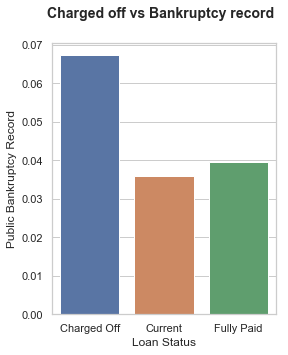

In [60]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(4,5))
plt.suptitle('Charged off vs Bankruptcy record', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='pub_rec_bankruptcies', data=loan_bkrpt_loan_status)
ax.set(xlabel='Loan Status', ylabel='Public Bankruptcy Record')

#### If pub bankruptcy value is high, there is a high risk that loan amount will not be paid.

#### Status vs Revol Util

In [61]:
loan_revol_util_loan_status = df_loan_cleaned[['revol_util','loan_status']]
#loan_status_loan_amt.describe()
loan_revol_util_loan_status = loan_revol_util_loan_status.groupby('loan_status').mean().reset_index()
loan_revol_util_loan_status

loan_status  revol_util
0  Charged Off       55.57
1      Current       53.20
2   Fully Paid       47.53

[Text(0, 0.5, 'Revolving line utilization rate'), Text(0.5, 0, 'Loan Status')]

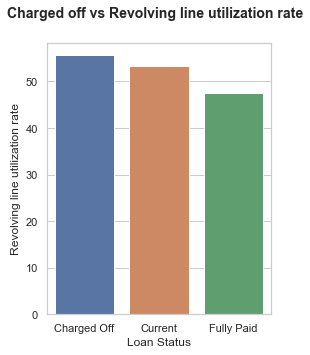

In [62]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 
# Set the figure size
plt.figure(figsize=(4,5))
plt.suptitle('Charged off vs Revolving line utilization rate', fontsize=14, fontweight='bold')
ax = sns.barplot(x='loan_status',y='revol_util', data=loan_revol_util_loan_status)
ax.set(xlabel='Loan Status', ylabel='Revolving line utilization rate')

#### If revol util value is high, there is a high risk that loan amount will not be paid.

#### purpose vs avg dti

In [63]:
#### Loan purpose vs total loan distribution
loan_purpose_dti = df_loan_cleaned[['purpose','dti']]
loan_purpose_dti = loan_purpose_dti.groupby('purpose').mean().reset_index()
loan_purpose_dti = loan_purpose_dti.sort_values(by='dti',ascending=True)
loan_purpose_dti

purpose   dti
5                house 10.67
6       major_purchase 10.82
11      small_business 11.11
4     home_improvement 11.13
0                  car 11.16
3          educational 11.21
8               moving 11.74
10    renewable_energy 12.06
7              medical 12.17
12            vacation 12.20
9                other 12.28
13             wedding 12.29
2   debt_consolidation 14.48
1          credit_card 14.61

[Text(0, 0.5, 'DTI'), Text(0.5, 0, 'Loan Purpose')]

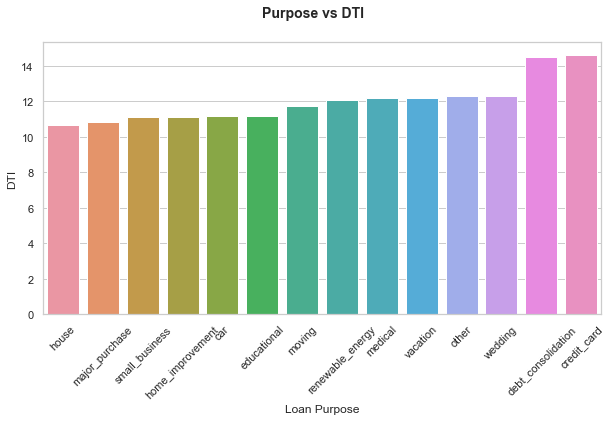

In [64]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 

# Set the figure size
plt.figure(figsize=(10,5))
plt.suptitle('Purpose vs DTI', fontsize=14, fontweight='bold')
ax = sns.barplot(x='purpose',y='dti', data=loan_purpose_dti)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Loan Purpose', ylabel='DTI')

#ax.set_xticklabels(sns.get_xticklabels(), rotation=40, ha="right")

### Lending club authority should look into debt_consolidation and credit_card products immediately. Here we can see that people's DTI is very high which is eventually  making them go bankrupt. We know when DTI is very high there is a high risk that cutomer will not be paying off the loans.

#### DTI vs Emp Length

In [65]:
loan_emp_length_dti = df_loan_cleaned[['emp_length','dti']]
loan_emp_length_dti = loan_emp_length_dti.groupby('emp_length').mean().reset_index()
loan_emp_length_dti = loan_emp_length_dti.sort_values(by='emp_length',ascending=True)
loan_emp_length_dti

emp_length   dti
0         0.00 12.96
1         0.50 12.56
2         1.00 13.07
3         2.00 13.10
4         3.00 13.16
5         4.00 13.19
6         5.00 13.42
7         6.00 13.82
8         7.00 13.67
9         8.00 13.77
10        9.00 13.54
11       10.00 13.72

[Text(0, 0.5, 'DTI'), Text(0.5, 0, 'Emp Length')]

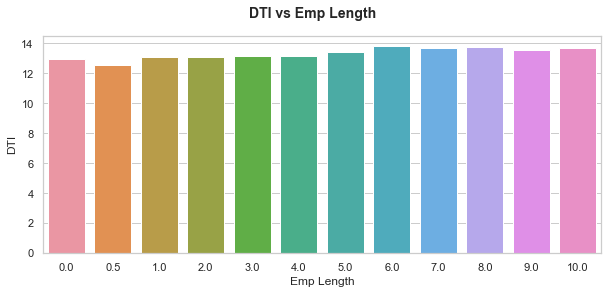

In [66]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 

# Set the figure size
plt.figure(figsize=(10,4))
plt.suptitle('DTI vs Emp Length', fontsize=14, fontweight='bold')
ax = sns.barplot(x='emp_length',y='dti', data=loan_emp_length_dti)
ax.set(xlabel='Emp Length', ylabel='DTI')
#ax.set_xticklabels(sns.get_xticklabels(), rotation=40, ha="right")

#### Emp length vs charged off

In [67]:
loan_emp_length_charged_off = df_loan_cleaned[['emp_length','loan_status']]
loan_emp_length_charged_off = loan_emp_length_charged_off[(loan_emp_length_charged_off['loan_status']=='Charged Off')]
loan_emp_length_charged_off = loan_emp_length_charged_off.groupby('emp_length').count().reset_index()
loan_emp_length_charged_off = loan_emp_length_charged_off.sort_values(by='emp_length',ascending=True)
#loan_purpose_dti

[Text(0, 0.5, 'Charged off count'), Text(0.5, 0, 'Employee Length')]

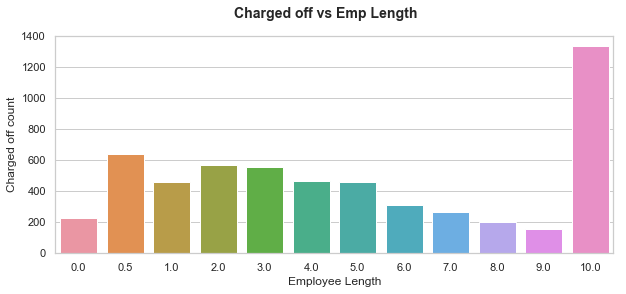

In [68]:
#setting seaborn theme
sns.set(style = "white")
sns.set(style="whitegrid") 

# Set the figure size
plt.figure(figsize=(10,4))
plt.suptitle('Charged off vs Emp Length', fontsize=14, fontweight='bold')
ax = sns.barplot(x='emp_length',y='loan_status', data=loan_emp_length_charged_off)
ax.set(xlabel='Employee Length', ylabel='Charged off count')
#ax.set_xticklabels(sns.get_xticklabels(), rotation=40, ha="right")

#### From "Charged off vs Emp Length" plot we can see there is highest no of charged off from 10+ year experiened customers.so we will suggest LC to do proper back ground check of the customers who are asking for loans and having more than 10 years of experince